---
title: 'Lab 2'
author: "Hunter Blinkenberg"
embed-resources: true
format: 
    html:
        toc: true
        code-fold: true
        theme: cosmo
        echo: true
---

In [74]:
import pandas as pd
import numpy as np

In [2]:
avocados = pd.read_csv("C:/Users/hblin/OneDrive - Cal Poly/GSB 544/Week 2/avocado-updated-2020.csv")

1. This dataset is from the Hass Avocado Board (HAB). It describes historical data on avocado prices, and sales volume in cities, states, and regions of the USA. The data spans the years 2015-2020.

The variables and their desriptions are as follows:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold (small/medium avocados)

4225 - Total number of avocados with PLU 4225 sold (large avocados)

4770 - Total number of avocados with PLU 4770 sold (x-large avocados)

small_bags - Total number of small bags sold

large_bags - Total number of large bags sold

xlarge_bags - Total number of xlarge bags sold

In [12]:
#renaming PLU size
avocados_clean = avocados.rename(columns={'4046': 'small', '4225': 'large', '4770': 'xlarge'})


In [4]:
#finding unique values in geography variable
unique_values = avocados['geography'].unique()
#print(unique_values)

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']


In [14]:
#creating the region variable 
# Create a dictionary to map cities to regions
region_mapping = {
    'Albany': 'Northeast', 'Atlanta': 'South', 'Baltimore/Washington': 'South',
    'Boise': 'West', 'Boston': 'Northeast', 'Buffalo/Rochester': 'Northeast',
    'California': 'West', 'Charlotte': 'South', 'Chicago': 'Midwest',
    'Cincinnati/Dayton': 'Midwest', 'Columbus': 'Midwest', 'Dallas/Ft. Worth': 'South',
    'Denver': 'West', 'Detroit': 'Midwest', 'Grand Rapids': 'Midwest',
    'Great Lakes': 'Midwest', 'Harrisburg/Scranton': 'Northeast',
    'Hartford/Springfield': 'Northeast', 'Houston': 'South', 'Indianapolis': 'Midwest',
    'Jacksonville': 'South', 'Las Vegas': 'West', 'Los Angeles': 'West',
    'Louisville': 'Midwest', 'Miami/Ft. Lauderdale': 'South', 'Midsouth': 'South',
    'Nashville': 'South', 'New Orleans/Mobile': 'South', 'New York': 'Northeast',
    'Northeast': 'Northeast', 'Northern New England': 'Northeast', 'Orlando': 'South',
    'Philadelphia': 'Northeast', 'Phoenix/Tucson': 'West', 'Pittsburgh': 'Midwest',
    'Plains': 'Midwest', 'Portland': 'West', 'Raleigh/Greensboro': 'South',
    'Richmond/Norfolk': 'South', 'Roanoke': 'South', 'Sacramento': 'West',
    'San Diego': 'West', 'San Francisco': 'West', 'Seattle': 'West',
    'South Carolina': 'South', 'South Central': 'South', 'Southeast': 'South',
    'Spokane': 'West', 'St. Louis': 'Midwest', 'Syracuse': 'Northeast',
    'Tampa': 'South', 'Total U.S.': 'Other', 'West': 'West', 'West Tex/New Mexico': 'West'
}

# Create a new column 'Region' based on the 'geography' column
avocados_clean['Region'] = avocados_clean['geography'].map(region_mapping)


3. See code below. Technically "Other" aka the total US was first, but the specific major region that sold the most organic small hass avocados in 2017 was the West.

In [15]:
#separating date variable 
avocados_clean['date'] = pd.to_datetime(avocados_clean['date'])

avocados_clean['year'] = avocados_clean['date'].dt.year
avocados_clean['month'] = avocados_clean['date'].dt.month
avocados_clean['day'] = avocados_clean['date'].dt.day

In [25]:
region_sales_organic2017 = avocados_clean[(avocados_clean['type'] == 'organic') & (avocados_clean['year'] == 2017)].groupby('Region')['small'].sum().sort_values(ascending=False)

print(region_sales_organic2017)

Region
Other        6882024.42
West         5826061.33
South        3405183.34
Northeast    1730562.32
Midwest       561471.13
Name: small, dtype: float64


4. Split the data above, but code for finding which month is highest is below. It seems that May has the highest average volume of avocado sales.

In [23]:
avg_month_sales = avocados_clean.groupby('month')['total_volume'].mean().sort_values(ascending=False)
highest_avg_month = avg_month_sales.idxmax()
print(highest_avg_month)


5


In [24]:
avg_month_sales.head()

month
5    1.123632e+06
2    1.095374e+06
6    1.051247e+06
4    1.016582e+06
3    9.957150e+05
Name: total_volume, dtype: float64

5. According to the first chunks of code, LA has sold the most total volume of avocados, and when including outliers, this is shown by the plot, however it seems that NY has the highest average sales. 

In [19]:
import plotnine 
from plotnine import *

In [27]:
metro_mapping = {
    'New York': 'New York',
    'Los Angeles': 'Los Angeles',
    'San Diego': 'Los Angeles',
    'San Francisco': 'Los Angeles',
    'Chicago': 'Chicago',
    'Dallas/Ft. Worth': 'Dallas/Ft. Worth',
    'Houston': 'Houston',
    'Miami/Ft. Lauderdale': 'Miami/Ft. Lauderdale',
    'Philadelphia': 'Philadelphia',
    'Baltimore/Washington': 'Washington D.C./Baltimore',
    'Harrisburg/Scranton': 'Washington D.C./Baltimore',
    'Atlanta': 'Atlanta',
    'Boston': 'Boston',
    'Detroit': 'Detroit',
    'Seattle': 'Seattle',
    'Phoenix/Tucson': 'Phoenix',
    'Denver': 'Denver',
    'Las Vegas': 'Las Vegas',
    'Sacramento': 'San Francisco',
    'Orlando': 'Orlando/Tampa',
    'Tampa': 'Orlando/Tampa'
}

avocados_clean['metro'] = avocados_clean['geography'].map(metro_mapping).fillna('Other')

In [30]:
metro_sales = avocados_clean.groupby('metro')['total_volume'].sum()

metro_sales_sorted = metro_sales.sort_values(ascending=False)

metro_sales_sorted

metro
Other                        2.624090e+10
Los Angeles                  1.407332e+09
New York                     5.282452e+08
Dallas/Ft. Worth             4.362042e+08
Houston                      4.208438e+08
Phoenix                      3.825234e+08
Washington D.C./Baltimore    3.707410e+08
Orlando/Tampa                2.845294e+08
Denver                       2.779295e+08
Chicago                      2.576650e+08
Miami/Ft. Lauderdale         2.317448e+08
Boston                       2.041325e+08
Seattle                      2.024026e+08
Atlanta                      1.989941e+08
Philadelphia                 1.584327e+08
San Francisco                1.492713e+08
Detroit                      1.400228e+08
Las Vegas                    1.088508e+08
Name: total_volume, dtype: float64

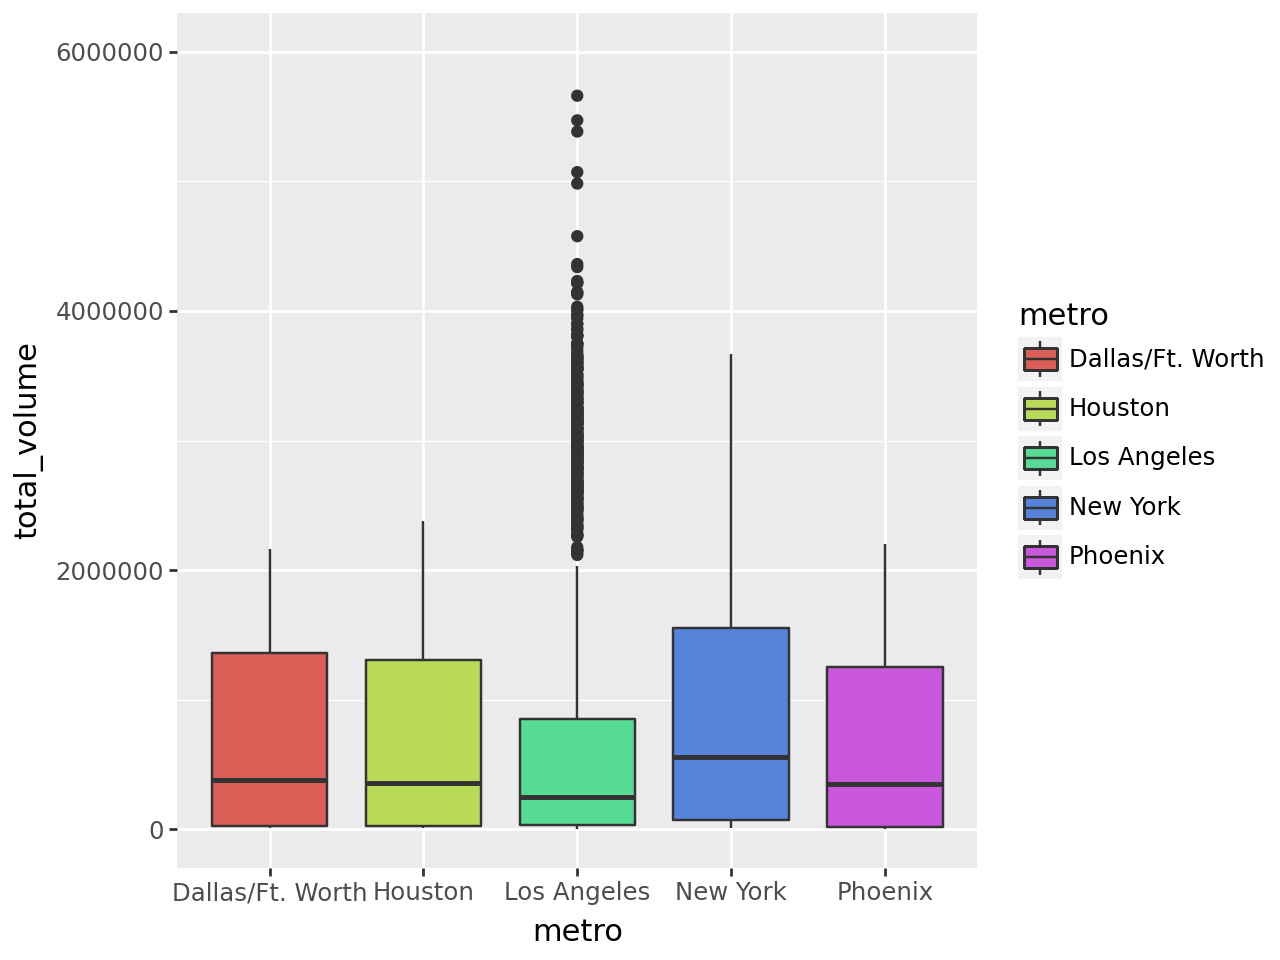

In [42]:
top_5_metros = (avocados_clean.groupby('metro')['total_volume'].mean()
                .sort_values(ascending= False)
                .head(6)
                .index)

top_5_metros_data = avocados_clean[avocados_clean['metro'].isin(top_5_metros)]
top_5_metros_data = top_5_metros_data[top_5_metros_data['metro'] != 'Other']

(ggplot(top_5_metros_data, aes(x='metro', y='total_volume', fill = "metro"))
 + geom_boxplot()
 + labs(
        x="metro", 
        y= "total_volume",
        )
        + ylim(0,6000000))

6. 

In [43]:
california_geog = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california= avocados_clean[avocados_clean['geography'].isin(california_geog)]


7. It seems that San Francisco has the largest difference in average price of conventional vs organic avocados at a $.71 more for organic avocados than conventional. 

In [ ]:
average_prices = california.groupby(['geography', 'type'])['average_price'].mean().unstack().reset_index()
average_prices.columns.name = None  # Remove the index name
average_prices = average_prices.rename(columns={'conventional': 'conventional_avg', 'organic': 'organic_avg'})

#print(average_prices)



In [48]:
average_prices['avg_dif']= average_prices['organic_avg'] - average_prices['conventional_avg']

print(average_prices)

       geography  conventional_avg  organic_avg   avg_dif
0    Los Angeles          1.047124     1.574902  0.527778
1     Sacramento          1.295359     1.873856  0.578497
2      San Diego          1.113856     1.798366  0.684510
3  San Francisco          1.400490     2.119444  0.718954


c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\geoms\geom_path.py:113: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


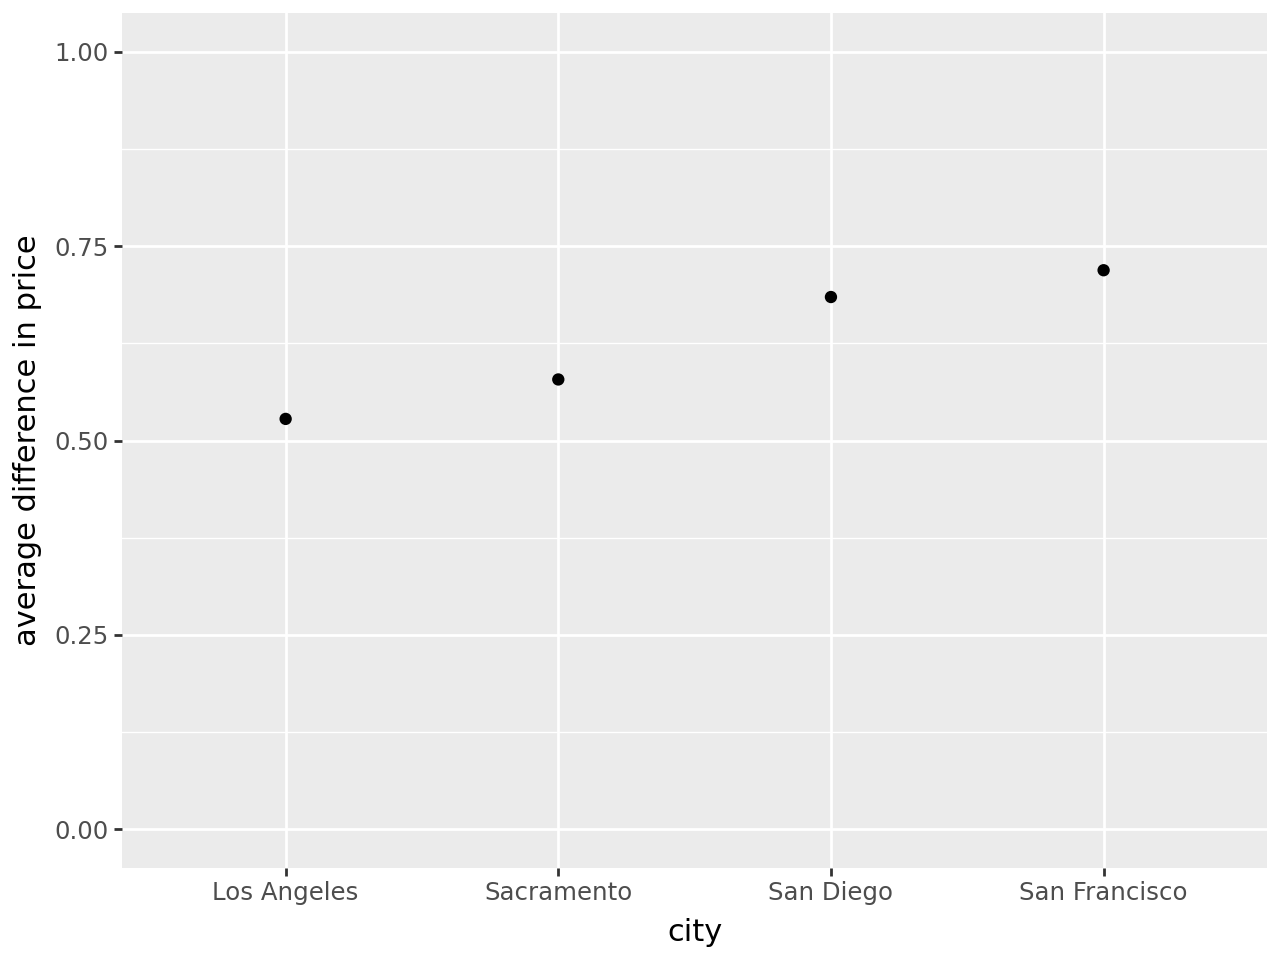

In [58]:
(ggplot(average_prices, aes(x='geography', y='avg_dif'))
 + geom_point()
 + geom_line(color='red')
 + labs(
        x="city", 
        y= "average difference in price",
        )
        + ylim(0,1))

8. 

In [60]:
california.loc[:, 'total_sales'] = california['small'] + california['large'] + california['xlarge']


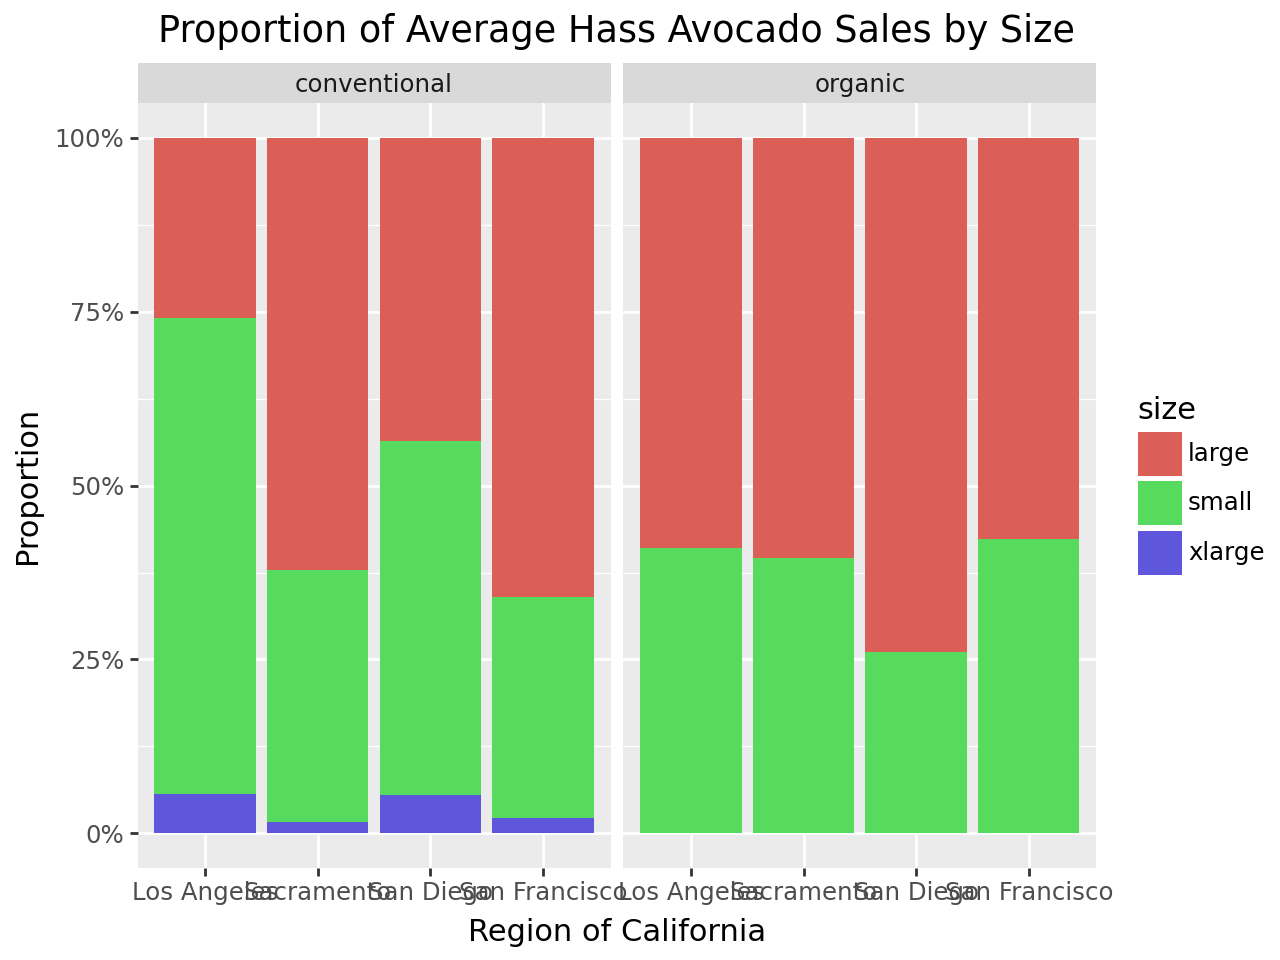

In [72]:

# Step 1: Reshape the DataFrame to long format
california_long = pd.melt(california, id_vars=['geography', 'type'], 
                           value_vars=['small', 'large', 'xlarge'],
                           var_name='size', value_name='volume')

# Step 2: Calculate total sales by geography, type, and size
total_sales = california_long.groupby(['geography', 'type', 'size']).agg(total_volume=('volume', 'sum')).reset_index()

# Step 3: Calculate total sales by geography and type for proportions
total_by_geo_type = total_sales.groupby(['geography', 'type'])['total_volume'].sum().reset_index()

# Step 4: Merge to get the proportion
merged = pd.merge(total_sales, total_by_geo_type, on=['geography', 'type'], suffixes=('', '_total'))

# Step 5: Calculate proportion
merged['proportion'] = merged['total_volume'] / merged['total_volume_total']

# Step 6: Create a plot
(
    ggplot(merged, aes(x='geography', y='proportion', fill='size')) +
    geom_bar(stat='identity', position='fill') +
    facet_wrap('~ type') +  # Create separate plots for conventional and organic
    labs(x='Region of California', y='Proportion', title='Proportion of Average Hass Avocado Sales by Size') +
    scale_y_continuous(labels=lambda l: [f"{int(x * 100)}%" for x in l]) 
)




Joining Data 

In [84]:
# Set the random seed for reproducibility
np.random.seed(42)

# Define the cities
geographies = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

# Create a function to simulate house prices
def simulate_house_prices(city, num_records):
    base_price = {
        'Los Angeles': 800000,
        'San Diego': 700000,
        'Sacramento': 500000,
        'San Francisco': 1200000
    }
    # Simulate house prices with some variation
    prices = np.random.normal(loc=base_price[city], scale=100000, size=num_records)
    return prices

# Create the dataset
num_records_per_city = 1000
data = {
    'geography': [],
    'house_price': [],
    'year': []  # Add year column
}

# Generate the data
for city in geographies:
    data['geography'].extend([city] * num_records_per_city)
    data['house_price'].extend(simulate_house_prices(city, num_records_per_city))
    data['year'].extend(np.random.randint(2015, 2021, size=num_records_per_city))  # Random year between 2015-2020

# Create the DataFrame
house_prices_df = pd.DataFrame(data)


In [86]:
houses = california.merge(house_prices_df, on= ["geography", "year"], how= 'inner')

houses

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Region,month,day,metro,total_sales,house_price
0,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4,Los Angeles,2426655.90,7.861736e+05
1,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4,Los Angeles,2426655.90,8.767435e+05
2,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4,Los Angeles,2426655.90,8.542560e+05
3,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4,Los Angeles,2426655.90,7.536582e+05
4,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4,Los Angeles,2426655.90,8.375698e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408139,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,organic,2020,San Francisco,West,11,29,Los Angeles,7357.53,1.188535e+06
408140,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,organic,2020,San Francisco,West,11,29,Los Angeles,7357.53,1.235335e+06
408141,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,organic,2020,San Francisco,West,11,29,Los Angeles,7357.53,1.132902e+06
408142,2020-11-29,1.87,59527.02,2815.23,4542.30,0.00,52169.49,52034.33,135.16,0.00,organic,2020,San Francisco,West,11,29,Los Angeles,7357.53,1.355511e+06


In [87]:
print(california['geography'].value_counts())
print(house_prices_df['geography'].value_counts())


geography
Los Angeles      612
Sacramento       612
San Diego        612
San Francisco    612
Name: count, dtype: int64
geography
Los Angeles      1000
San Diego        1000
Sacramento       1000
San Francisco    1000
Name: count, dtype: int64


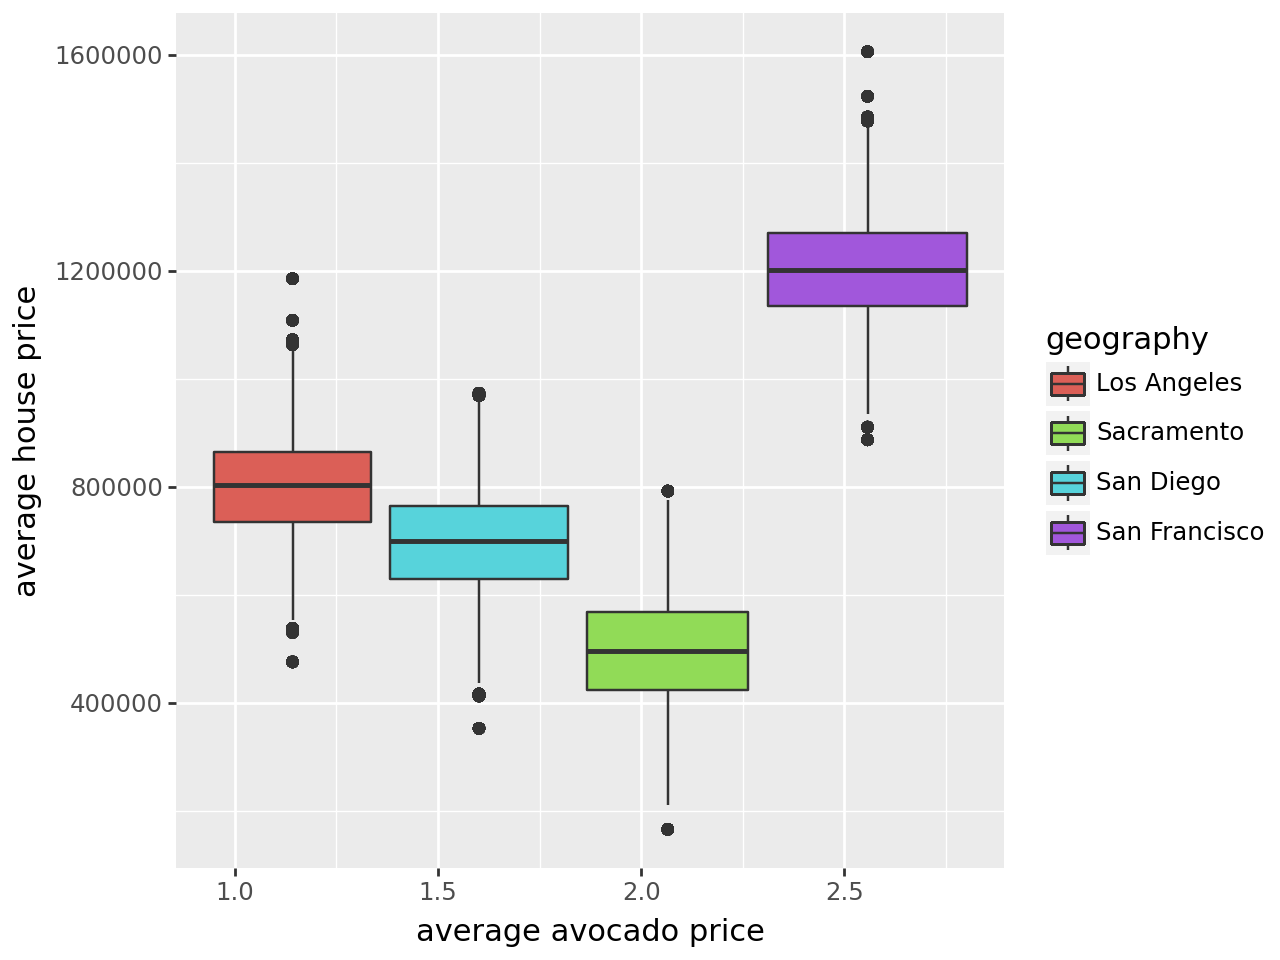

In [90]:
(ggplot(houses, aes(x='average_price', y='house_price', fill = 'geography'))
 + geom_boxplot()

 + labs(
        x="average avocado price", 
        y= "average house price",
        )
)

Using Outside Data: This visualization shows that house prices in San francisco seem to be much higher than in the other three cities in California. I cannot say why this is, but it also seems that avocado prices are relatively similar, albeit still the most expensive in San Francisco. However, they are second most expensive in Sacramento, who's average house prices are the lowest. This lends to the idea that even though avocados are expensive, Sacramento would give a millenial the best chance to buy a house while still affording their avocado toast. 

Ethics Statement and Reference: This analysis attempts to correctly and effectively analyze the avocado dataset by the HAB. Since there were no NA values within the dataset, none were omitted. However, when merging the two datasets (California and House prices), some values may have been repeatedly counted, but I am honestly not very sure. Also, Chat-GPT was used for certain visualization portions such as how to create the simulated data for housing prices, and some of the other visualizations like in question 8. I also used it to help group the cities into cohesive regions as I was not very familiar with all the geography. 